<center>
    
# Solution to Laplace Equation in Polar Coordinates

### Juan Sebastian Sierra Jaraba - jsierraj@unal.edu.co 
### Departamento de Física, Facultad de Ciencias, Sede Bogotá
### Universidad Nacional de Colombia
    
</center>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

In [6]:
#Iterations
N = 1000
#Parameters
r_init, theta_init = 0, 0
r_last, theta_last = 2, 2*np.pi/3
dr, dtheta = 0.05, 0.05

#Edge conditions
f_edge = lambda theta: 100
f_init = lambda r: 0
f_last = lambda r: 100


### Continue equation

$$ \nabla \psi = 0 $$

$$ \left[ \frac{\partial^2}{\partial r^2} + \frac{1}{r} \frac{\partial}{\partial r} + \frac{1}{r^2} \frac{\partial^2}{\partial \theta^2}\right] \psi = 0 $$

### Discret equation

$$ \frac{[\psi(r + \Delta r, \theta) - \psi(r, \theta)] - [\psi(r, \theta) - \psi(r - \Delta r, \theta)]}{2 \Delta r^2} + \frac{\psi(r + \Delta r, \theta) - \psi(r - \Delta r, \theta)}{2 r \Delta r} + \frac{[\psi(r, \theta + \Delta \theta) - \psi(r, \theta)] - [\psi(r, \theta) - \psi(r, \theta - \Delta \theta)]}{2 r^2 \Delta \theta^2} = 0$$

$$ \psi(r, \theta) \left[ \frac{1}{\Delta r^2} + \frac{1}{r^2 \Delta \theta^2} \right] = \frac{\psi(r + \Delta r, \theta) + \psi(r - \Delta r, \theta)]}{2 \Delta r^2} + \frac{\psi(r + \Delta r, \theta) - \psi(r - \Delta r, \theta)}{2 r \Delta r} + \frac{\psi(r, \theta + \Delta \theta) + \psi(r, \theta - \Delta \theta)}{2 r^2 \Delta \theta^2} $$

$$ \psi(r, \theta) =\frac{\frac{\psi(r + \Delta r, \theta) + \psi(r - \Delta r, \theta)]}{2 \Delta r^2} + \frac{\psi(r + \Delta r, \theta) - \psi(r - \Delta r, \theta)}{2 r \Delta r} + \frac{\psi(r, \theta + \Delta \theta) + \psi(r, \theta - \Delta \theta)}{2 r^2 \Delta \theta^2}}{\frac{1}{\Delta r^2} + \frac{1}{r^2 {\Delta \theta}^2}} $$

In [7]:
#Solver function
def polar_laplace(r_init, r_last, dr, theta_init, theta_last, dtheta, f_edge, f_init, f_last, N):
    
    r_space, theta_space = np.arange(r_init, r_last + dr, dr), np.arange(theta_init, theta_last + dtheta, dtheta)
    r_len, theta_len = r_space.size, theta_space.size

    sol = np.ones((r_len, theta_len))

    sol[-1] = f_edge(theta_space)
    sol[:, 0] = f_init(r_space)
    sol[:, -1] = f_last(r_space)
    
    for it in range(N):
        for r in range(1, r_len-1):
            for t in range(1, theta_len-1):
                sol[r, t] = ((sol[r+1, t]+sol[r-1, t])/(2*dr**2) + (sol[r, t+1]+sol[r, t-1])/(2*(r*dr*dtheta)**2) + (sol[r+1, t] - sol[r-1, t])/(2*r*dr**2))/(1/dr**2 + 1/(r*dr*dtheta)**2)
    
    return theta_space, r_space, sol

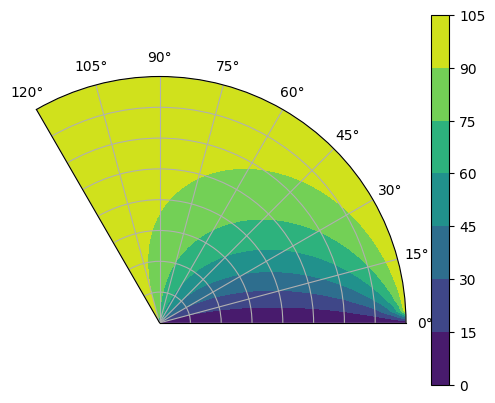

In [8]:
# plotting
plot = polar_laplace(r_init, r_last, dr, theta_init, theta_last, dtheta, f_edge, f_init, f_last, N)

ax = plt.subplot(111, polar=True)
ax.set_yticklabels([])
ctf = ax.contourf(plot[0], plot[1], plot[2])
plt.colorbar(ctf)
plt.axis([theta_init, theta_last, r_init, r_last])
plt.show()

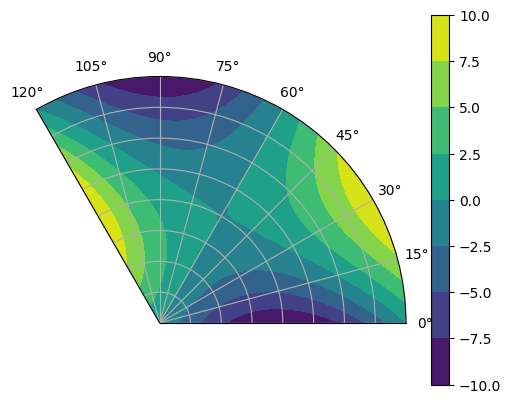

In [10]:
# Redefine edge conditions as functions of the variables
f_edge = lambda theta: 10*np.sin(2*np.pi*(theta - theta_init)/(theta_last - theta_init))
f_init = lambda r: -10*np.sin(np.pi*(r - r_init)/(r_last - r_init))
f_last = lambda r: 10*np.sin(np.pi*(r - r_init)/(r_last - r_init))

# plotting
plot = polar_laplace(r_init, r_last, dr, theta_init, theta_last, dtheta, f_edge, f_init, f_last, N)

ax = plt.subplot(111, polar=True)
ax.set_yticklabels([])
ctf = ax.contourf(plot[0], plot[1], plot[2])
plt.colorbar(ctf)
plt.axis([theta_init, theta_last, r_init, r_last])
plt.show()